Sampel Dataset

In [13]:
import pandas as pd

sensus = {
    'tinggi': [170, 151, 160, 152, 157, 181, 149, 167, 165, 177],
    'berat': [61, 72, 58, 75, 56, 64, 71, 81, 68, 80],
    'jk': ['wanita', 'pria', 'wanita', 'wanita', 'pria', 'pria', 'wanita', 'pria', 'pria', 'pria']
}

sensus_df = pd.DataFrame(sensus)
sensus_df

,tinggi,berat,jk
0,170,61,wanita
1,151,72,pria
2,160,58,wanita
3,152,75,wanita
4,157,56,pria
5,181,64,pria
6,149,71,wanita
7,167,81,pria
8,165,68,pria
9,177,80,pria


Visualisasi Data

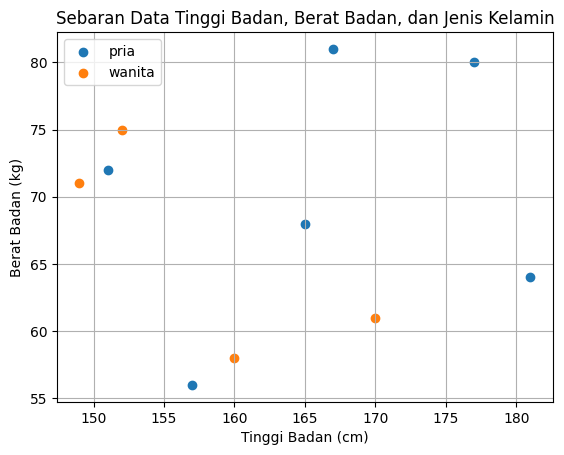

In [14]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for jk, d in sensus_df.groupby('jk'):
    ax.scatter(d['tinggi'], d['berat'], label = jk)

plt.legend(loc='upper left')
plt.title('Sebaran Data Tinggi Badan, Berat Badan, dan Jenis Kelamin')
plt.xlabel('Tinggi Badan (cm)')
plt.ylabel('Berat Badan (kg)')
plt.grid(True)
plt.show()

Preprocessing Dataset

In [15]:
import numpy as np

x_train = np.array(sensus_df[['tinggi', 'berat']])
y_train = np.array(sensus_df['jk'])

print(f'x_train:\n{x_train}\n')
print(f'y_train: {y_train}')

x_train:
[[170  61]
 [151  72]
 [160  58]
 [152  75]
 [157  56]
 [181  64]
 [149  71]
 [167  81]
 [165  68]
 [177  80]]

y_train: ['wanita' 'pria' 'wanita' 'wanita' 'pria' 'pria' 'wanita' 'pria' 'pria'
 'pria']


In [16]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
print(f'y_train:\n{y_train}')

y_train:
[[1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]]


In [7]:
y_train = y_train.flatten()
print(f'y_train: {y_train}')

y_train: [1 0 1 1 0 0 1 0 0 0]


Training KNN Classification Model

In [8]:
from sklearn.neighbors import KNeighborsClassifier

K = 3
model = KNeighborsClassifier(n_neighbors=K)
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Prediksi Jenis Kelamin

In [9]:
tinggi_badan = 168
berat_badan = 66
x_new = np.array([tinggi_badan, berat_badan]).reshape(1, -1)
x_new

array([[168,  66]])

In [10]:
y_new = model.predict(x_new)
y_new

array([1])

In [11]:
lb.inverse_transform(y_new)

array(['wanita'], dtype='<U6')

Visualisasi Nearest Neighbours

<function matplotlib.pyplot.show(close=None, block=None)>

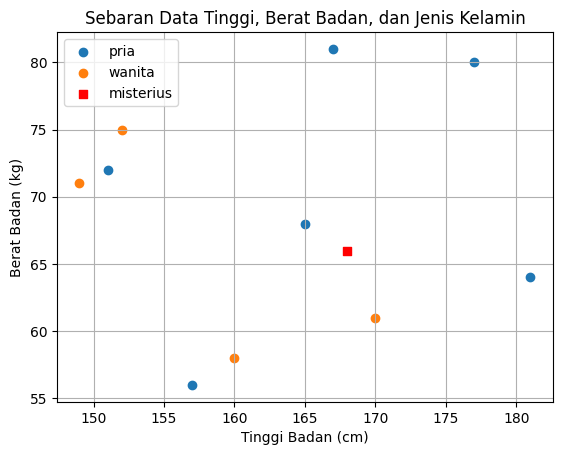

In [18]:
fig, ax = plt.subplots()
for jk, d in sensus_df.groupby('jk'):
    ax.scatter(d['tinggi'], d['berat'], label=jk)

plt.scatter(tinggi_badan,
            berat_badan,
            marker='s',
            color='red',
            label='misterius')

plt.legend(loc='upper left')
plt.title('Sebaran Data Tinggi, Berat Badan, dan Jenis Kelamin')
plt.xlabel('Tinggi Badan (cm)')
plt.ylabel('Berat Badan (kg)')
plt.grid(True)
plt.show

Kalkulasi Distance (Euclidean Distance)

In [19]:
misterius = np.array([tinggi_badan, berat_badan])
misterius

array([168,  66])

In [20]:
x_train

array([[170,  61],
       [151,  72],
       [160,  58],
       [152,  75],
       [157,  56],
       [181,  64],
       [149,  71],
       [167,  81],
       [165,  68],
       [177,  80]], dtype=int64)

In [21]:
from scipy.spatial.distance import euclidean

data_jarak = [euclidean(misterius, d) for d in x_train]
data_jarak

[5.385164807134504,
 18.027756377319946,
 11.313708498984761,
 18.35755975068582,
 14.866068747318506,
 13.152946437965905,
 19.6468827043885,
 15.033296378372908,
 3.605551275463989,
 16.64331697709324]

In [22]:
sensus_df['jarak'] = data_jarak
sensus_df.sort_values(['jarak'])

,tinggi,berat,jk,jarak
8,165,68,pria,3.605551
0,170,61,wanita,5.385165
2,160,58,wanita,11.313708
5,181,64,pria,13.152946
4,157,56,pria,14.866069
7,167,81,pria,15.033296
9,177,80,pria,16.643317
1,151,72,pria,18.027756
3,152,75,wanita,18.357560
6,149,71,wanita,19.646883


KNN Classification Model

In [23]:
x_test = np.array([[172,75], [160,52], [163, 54], [178,80]])
y_test = lb.transform(np.array(['pria', 'wanita', 'wanita', 'pria'])).flatten()

print(f'x_test:\n{x_test}\n')
print(f'y_test:\n{y_test}')

x_test:
[[172  75]
 [160  52]
 [163  54]
 [178  80]]

y_test:
[0 1 1 0]


In [24]:
y_pred = model.predict(x_test)
y_pred

array([0, 1, 1, 0])

Accuracy (Akurasi)

In [25]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)

print(f'Accuracy: {acc}')

Accuracy: 1.0


Precision (Presisi)

In [26]:
from sklearn.metrics import precision_score

prec = precision_score(y_test, y_pred)

print(f'Precission: {prec}')

Precission: 1.0


Recall

In [27]:
from sklearn.metrics import recall_score

rec = recall_score(y_test, y_pred)

print(f'Recall: {rec}')

Recall: 1.0


F1 Score

In [28]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)

print(f'F1-score: {f1}')

F1-score: 1.0


Classification Report

In [29]:
from sklearn.metrics import classification_report

cls_report = classification_report(y_test, y_pred)

print(f'Classification Report:\n{cls_report}')

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



Matthews Correlation Coefficient (MCC)

In [34]:
from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(y_test, y_pred)

print(f'MCC: {mcc}')

MCC: 1.0
